In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

from preprocessing import Preprocessing
from utils.consts import *

processer = Preprocessing()

[2022-06-18 19:57:27] preprocessing.py:19 [INFO] - loading lc_data ...
[2022-06-18 19:57:28] preprocessing.py:32 [INFO] - loading lp_data ...
[2022-06-18 19:57:30] preprocessing.py:49 [INFO] - loading lclp_data ...
[2022-06-18 19:57:30] preprocessing.py:79 [INFO] - generating loan_data ...


> 借款额度可视化--箱线图：

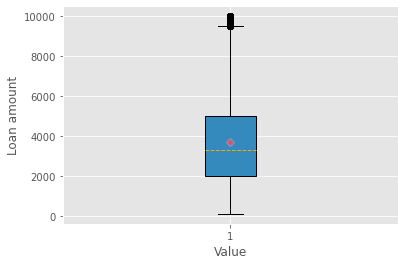

In [2]:
def boxplot(processor):
    plt.style.use("ggplot")
    plt.ylabel('Loan amount')
    plt.xlabel("Value")
    plt.boxplot(
        x=processor.loan.loc[processor.loan["借款金额"] <= 10000, "借款金额"],
        patch_artist=True,
        showmeans=True,
        meanprops={"marker": "D", "markerfacecolor": "indianred"},
        medianprops={"linestyle": "--", "color": "orange"},
    )
    plt.savefig(BOXPLOT_PATH)

boxplot(processer)

> 箱线图表明借款额度主要分布在2000~5000之间，为小额贷款

> 贷款期限可视化--柱状图：

<AxesSubplot:title={'center':'Loan Term Selection'}>

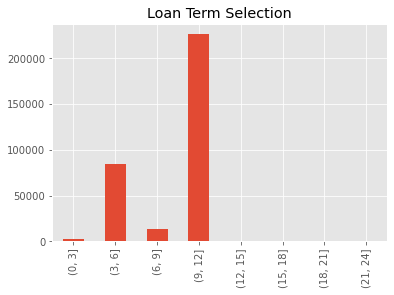

In [3]:
processer.loan['借款期限段'].value_counts().sort_index().plot(kind ='bar', title='Loan Term Selection')

> 违约贷款利率可视化--柱状图：

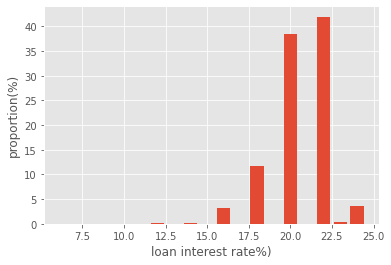

In [13]:
interest_rate_pct = (100*processer.loan['借款利率'].value_counts()/len(processer.loan)).round(2).reset_index()
interest_rate_pct.rename(columns={'index': '借款利率(%)', '借款利率': '占比(%)'}, inplace=True)
interest_rate_pct.head()
plt.bar(interest_rate_pct['借款利率(%)'],interest_rate_pct['占比(%)'])
plt.xlabel('loan interest rate%)')
plt.ylabel('proportion(%)')
plt.show()

> 贷款用户年龄分布--柱状图：

<AxesSubplot:title={'center':'age distribution'}>

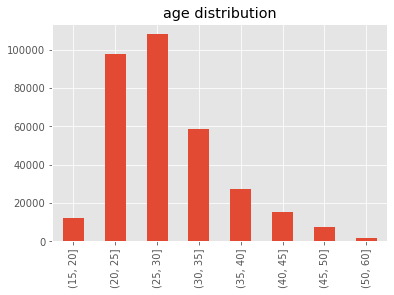

In [16]:
processer.loan['年龄段'].value_counts().sort_index().plot(kind='bar', title='age distribution')

> 特征编码

In [3]:
from utils.feature_encoder import encoder
obj = encoder(processer.loan)
obj.head()

,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,手机认证,...,本笔已逾期次数,剩余未还本金,剩余未还利息,还款状态,期数,逾期天数,历史逾期还款占比,年龄段,借款期限段,target
ListingId,,,,,,,,,,,,,,,,,,,,,
126541,10577,11,17,118,2,1,0,18,1,0,...,4,0,0,2,11,2,701,3,3,0
133291,8861,11,21,69,3,1,0,17,1,1,...,3,0,0,2,11,8,337,3,3,0
142421,10655,17,21,476,4,2,0,24,1,0,...,1,79417,42870,3,21,5,454,5,7,0
149711,10648,11,17,83,2,1,0,17,1,0,...,0,0,0,3,11,0,135,3,3,0
152141,10606,5,15,21,2,3,0,7,1,0,...,0,0,0,1,5,0,451,1,1,0


<AxesSubplot:>

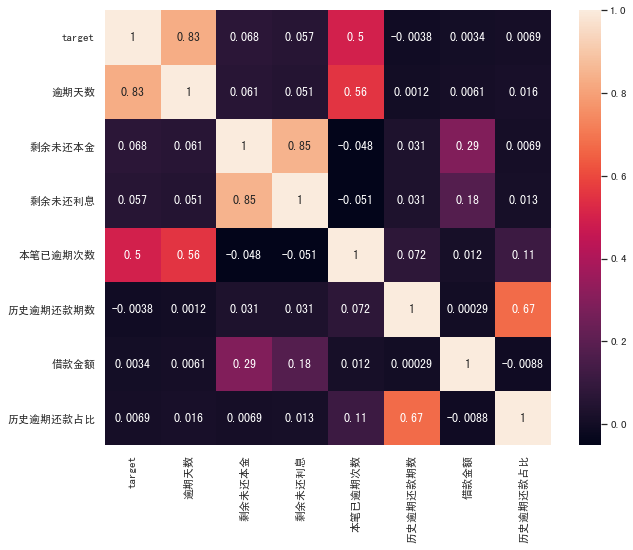

In [10]:
# 查看target与可能的相关特征之间的相关系数
ext_loan = processer.loan[['target', '逾期天数', '剩余未还本金', '剩余未还利息','本笔已逾期次数','历史逾期还款期数','淘宝认证','借款金额','历史逾期还款占比']]
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题
plt.figure(figsize=(10, 8))
sns.heatmap(ext_loan.corr(), annot=True)